<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-456-Speech/blob/main/assignment-solutions/assignment%202/Assignment2_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Reading

- Read Sections 14.5 from the main book
- Watch videos 5,6, and 16 from the _Audio Signal Processing for ML_ tutorial

## Implementation

Write  python program to perform the following tasks:
- Record or use given speech audio samples
- Compute the frequency spectrum of the speech signals using the Fast Fourier Transform (FFT)
- Plot the frequency spectrum as well as the original waveform along with the sinusoidal components
- Identify and discuss dominant frequencies and fundamental frequency (F0) for different spoken words or phonemes
- Generate spectrograms by applying Short-Time Fourier Transform (STFT) on speech signals
- Plot the spectrogram along with the spoken words (each word is written under each block in spectrogram)
- Plot and interpret spectrograms and discuss formant patterns and phoneme distinctions
- Explore different window sizes and overlaps and analyze their effect on time-frequency resolution

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import find_peaks
from IPython.display import Audio

In [ ]:

file_path = '/content/hi,how are you.mp3'
waveform, sample_rate = librosa.load(file_path)

In [ ]:
Audio(data=waveform, rate=sample_rate)


## Compute the frequency spectrum of the speech signals using the Fast Fourier Transform (FFT)


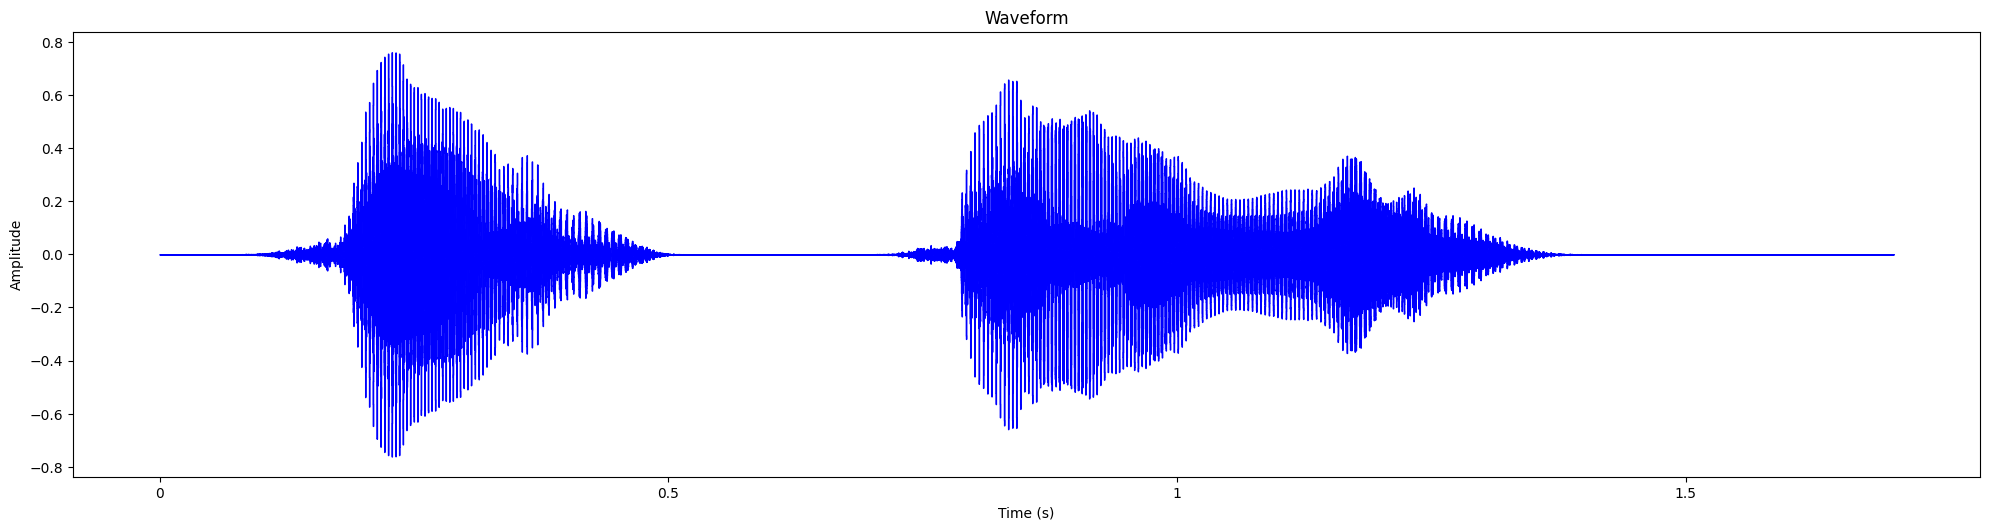

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)

librosa.display.waveshow(waveform, sr=sample_rate ,color='blue')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:

N = len(waveform)
X = np.fft.fft(waveform)
X_mag = np.abs(X)
f = np.fft.fftfreq(N, d=1/sample_rate)

In [ ]:
positive_frequencies = f[:N // 2]
positive_magnitudes = X_mag[:N // 2]

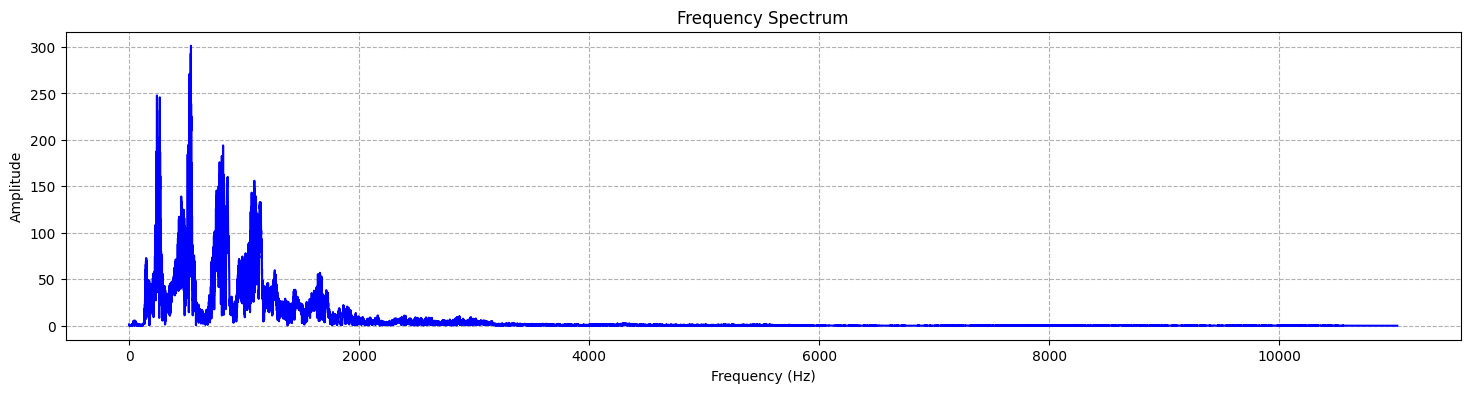

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(positive_frequencies, positive_magnitudes, color='blue')
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--')
plt.show()

# Identify Dominant Frequencies




In [ ]:
peaks, _ = find_peaks(positive_magnitudes, height=np.max(positive_magnitudes)*0.1)
dominant_freqs = positive_frequencies[peaks[:5]]
print("Dominant Frequencies (Hz):", dominant_freqs)


Dominant Frequencies (Hz): [139.66838771 140.84207165 142.01575558 143.18943951 144.36312344]


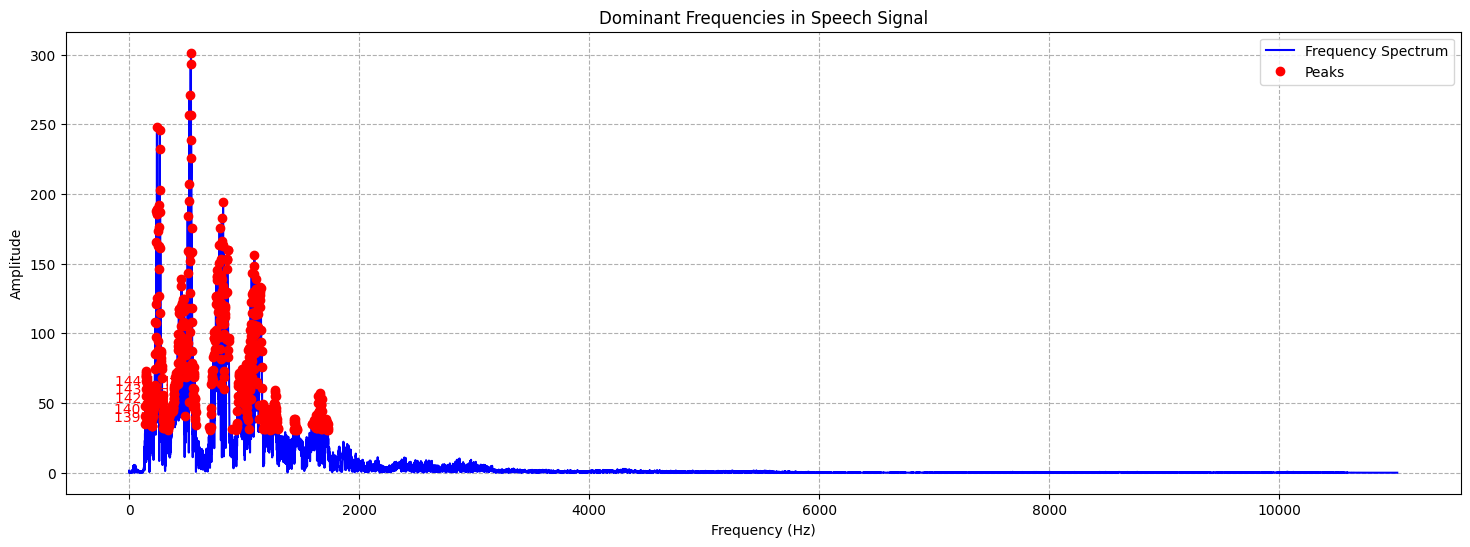

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(positive_frequencies, positive_magnitudes, color='blue', label='Frequency Spectrum')
plt.plot(positive_frequencies[peaks], positive_magnitudes[peaks], 'ro', label='Peaks')
# Add text labels for the top 5 dominant frequencies
for i in range(min(5, len(peaks))):
    freq = positive_frequencies[peaks[i]]
    mag = positive_magnitudes[peaks[i]]
    plt.text(freq, mag, f"{freq:.1f} Hz", color='red', fontsize=10, ha='center', va='bottom')

plt.title('Dominant Frequencies in Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# Estimate F0 using pyin


In [ ]:
f0, voiced_flag, voiced_prob = librosa.pyin(
    waveform,
    fmin=50,
    fmax=500,
    sr=sample_rate
)

In [ ]:
times = librosa.times_like(f0)

# Remove NaN (unvoiced parts)
f0_clean = np.where(np.isnan(f0), 0, f0)

In [ ]:
N_FFT = 2048
HOP_LENGTH = 512
D = librosa.stft(waveform, n_fft=N_FFT, hop_length=HOP_LENGTH)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


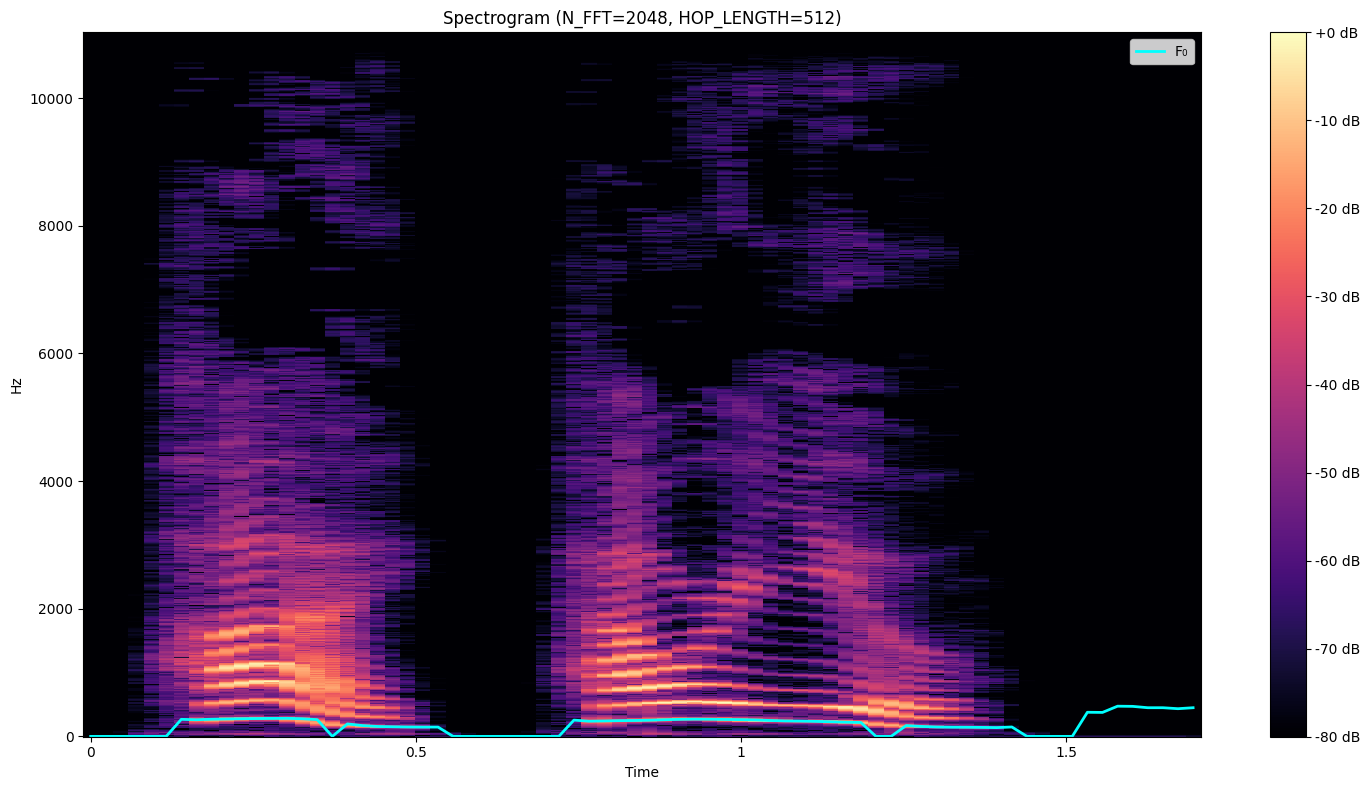

In [ ]:
plt.figure(figsize=(15, 8))
librosa.display.specshow(S_db,
                         sr=sample_rate,
                         x_axis='time',
                         y_axis='hz',
                         hop_length=HOP_LENGTH,
                         cmap='magma')

plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram (N_FFT={N_FFT}, HOP_LENGTH={HOP_LENGTH})')

# Overlay the F0 curve
plt.plot(times, f0_clean, color='cyan', linewidth=2, label='F₀')


plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Sinsoidal components

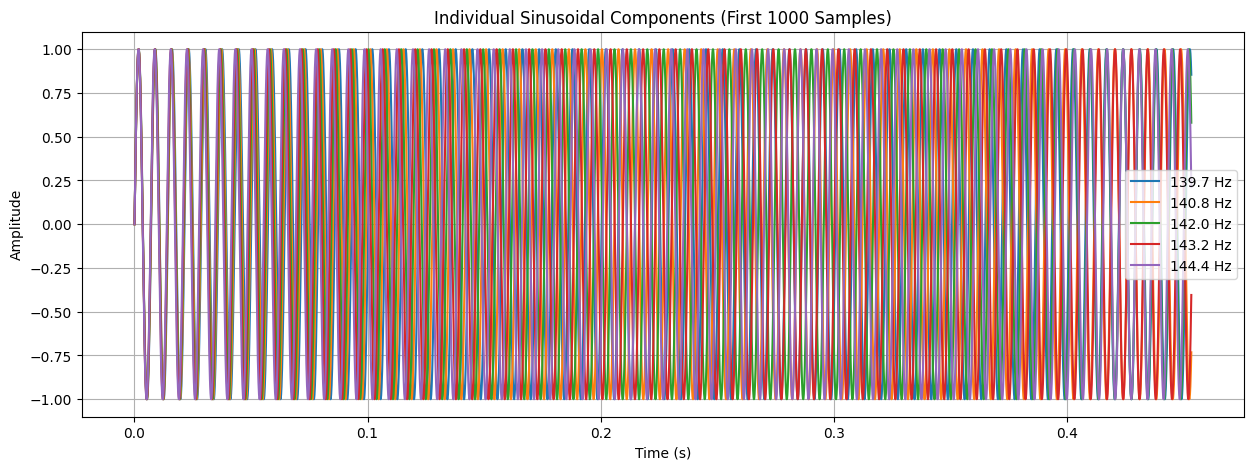

In [ ]:
t = np.linspace(0, len(waveform) / sample_rate, len(waveform))

sinusoids = np.zeros_like(waveform)

plt.figure(figsize=(15, 5))

for f in dominant_freqs[:5]:
    component = np.sin(2 * np.pi * f * t)
    sinusoids += component
    plt.plot(t[:10000], component[:10000], label=f'{f:.1f} Hz')

plt.title('Individual Sinusoidal Components ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



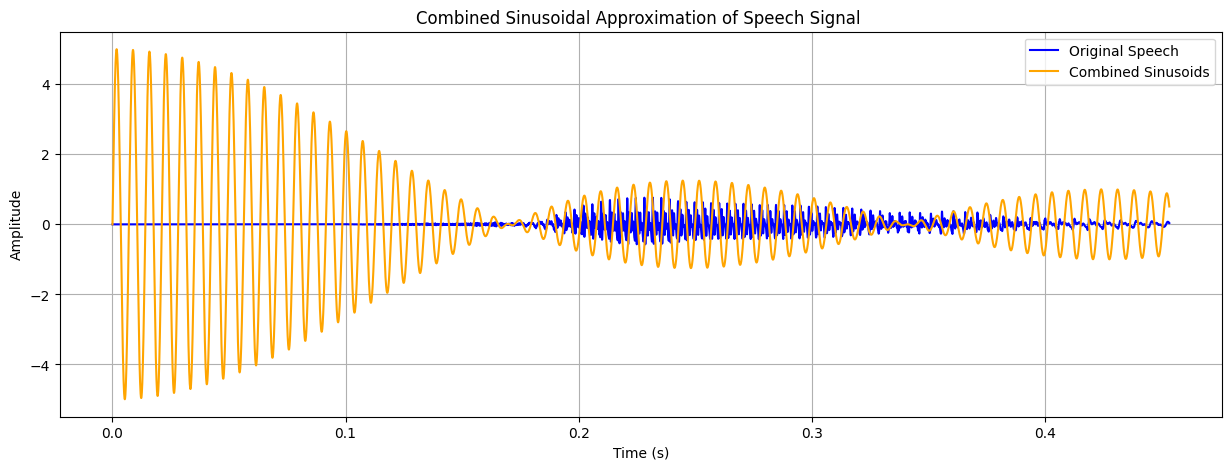

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(t[:10000], waveform[:10000], color='blue', label='Original Speech')

plt.plot(t[:10000],sinusoids[:10000], color='orange', label='Combined Sinusoids')

plt.title('Combined Sinusoidal Approximation of Speech Signal ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# Compare with the original waveform


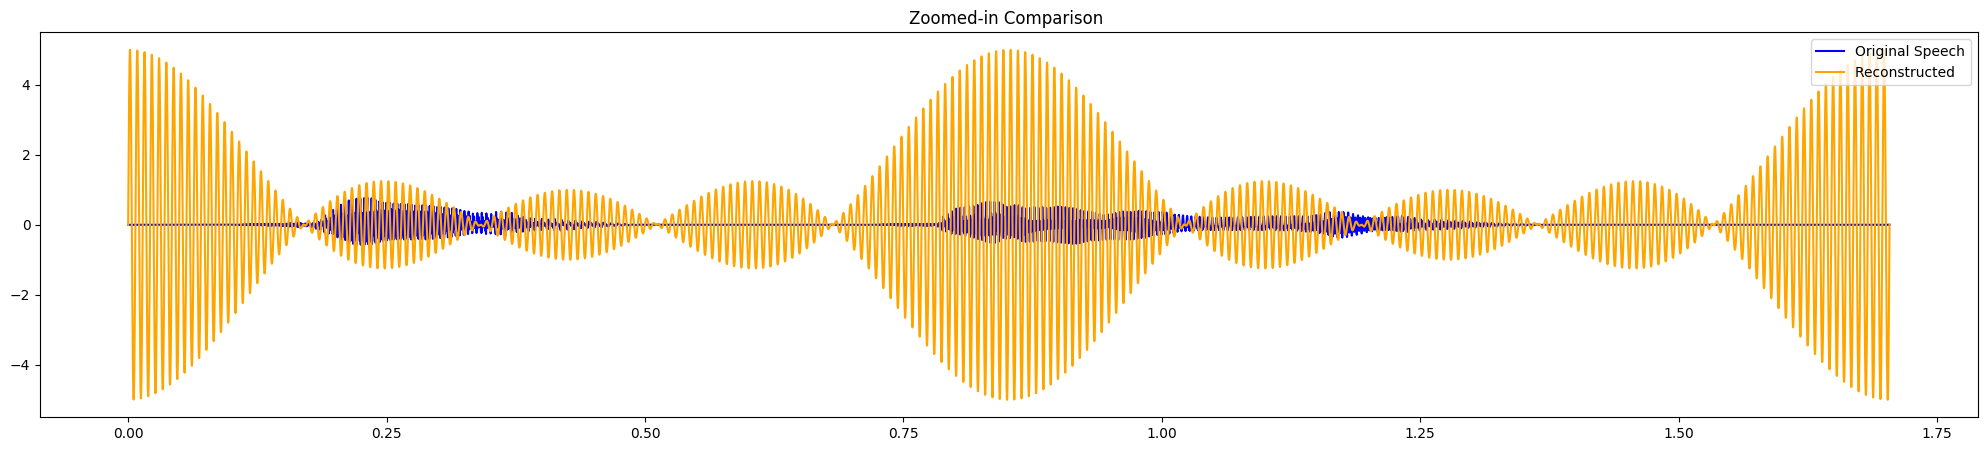

In [ ]:
plt.figure(figsize=(25, 5))

plt.plot(t, waveform, color='blue', label='Original Speech')
plt.plot(t, sinusoids, color='orange', label='Reconstructed ')
plt.title('Zoomed-in Comparison ')
plt.legend()
plt.show()


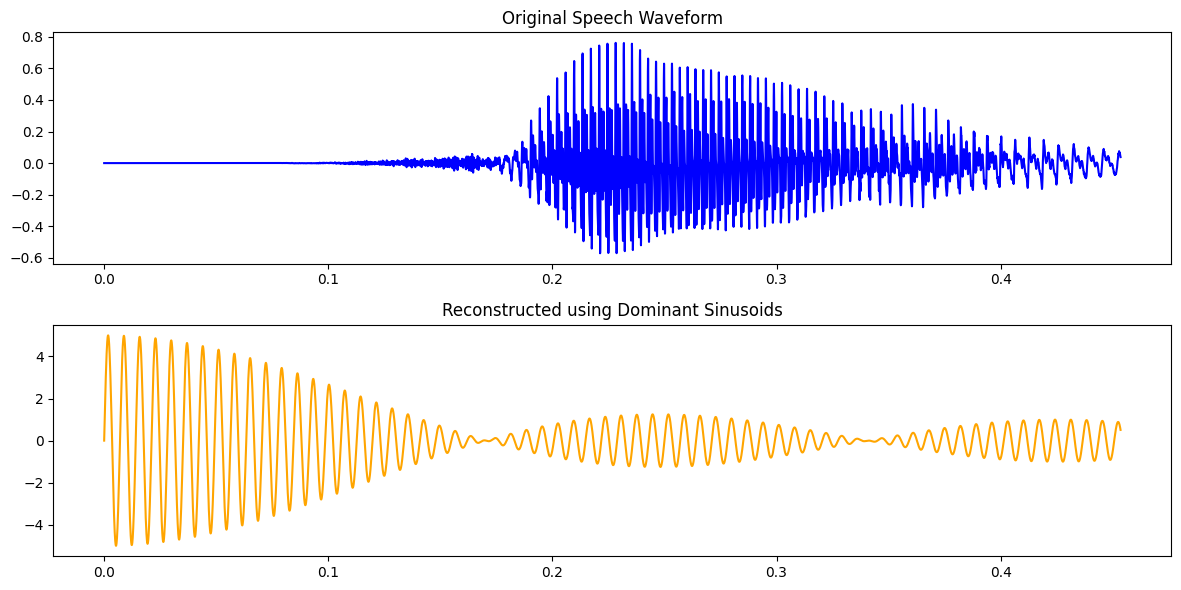

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t[:10000], waveform[:10000], color='blue')
plt.title('Original Speech Waveform')

plt.subplot(2, 1, 2)
plt.plot(t[:10000], sinusoids[:10000], color='orange')
plt.title('Reconstructed using Dominant Sinusoids')

plt.tight_layout()
plt.show()


# 2. Short-Time Fourier Transform (STFT) and Spectrogram


# Generate Spectrogram


In [ ]:
N_FFT = 1024
Overlap_val = 256  # Overlap

# Compute STFT
S = librosa.stft(waveform, n_fft=N_FFT, hop_length=Overlap_val )

S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)



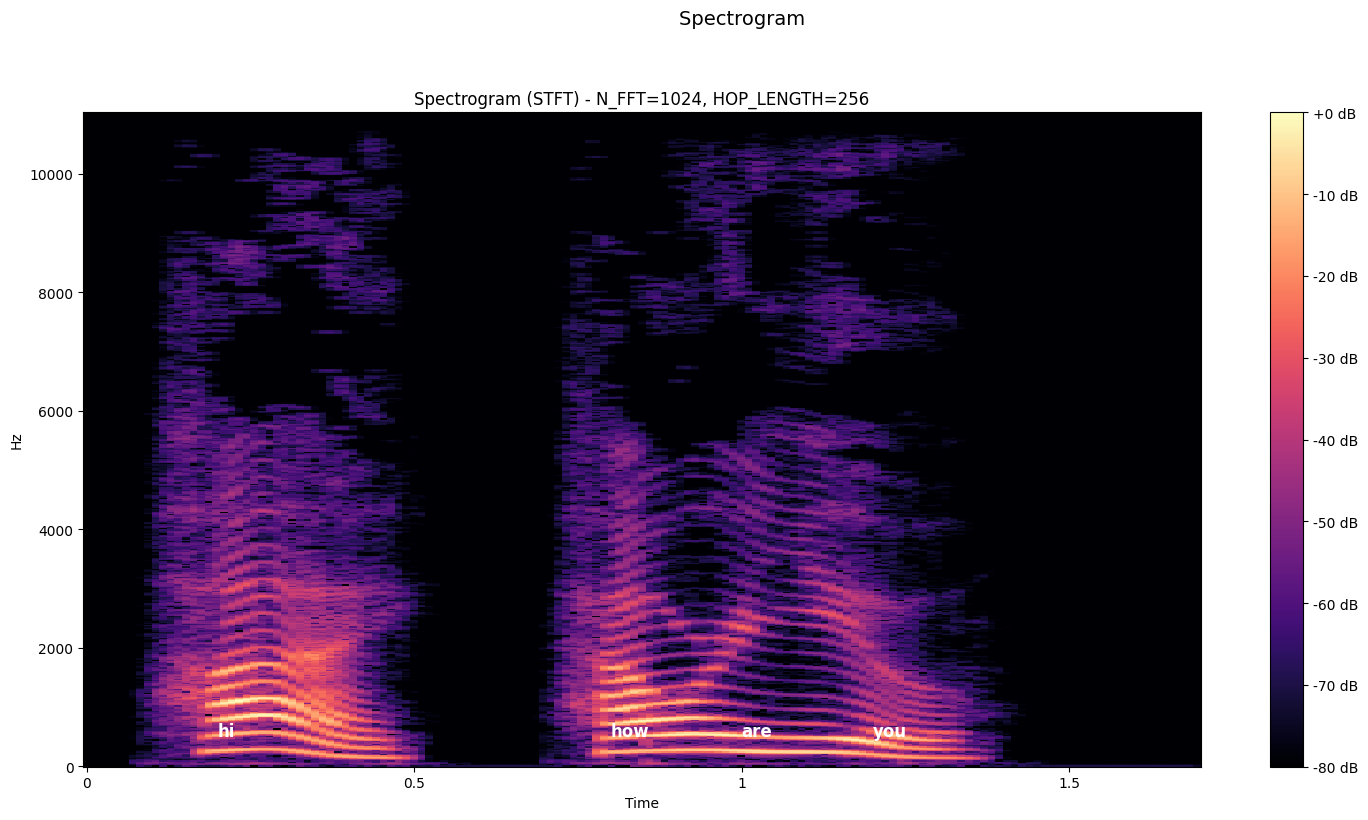

In [ ]:
plt.figure(figsize=(15, 8))
librosa.display.specshow(S_db,
                         sr=sample_rate,
                         x_axis='time',
                         y_axis='hz',
                         hop_length=Overlap_val,
                         cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram (STFT) - N_FFT={N_FFT}, HOP_LENGTH={Overlap_val}')
plt.suptitle('Spectrogram ', fontsize=14, y=1.02)

plt.text(0.2, 500, 'hi', color='white', fontsize=12, fontweight='bold')
plt.text(0.8, 500, "how", color='white', fontsize=12, fontweight='bold')
plt.text(1.0, 500, "are", color='white', fontsize=12, fontweight='bold')
plt.text(1.2, 500, "you", color='white', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Analysis of Time-Frequency Trade-off


| Parameter                | Small Value                                          | Large Value                                          | Effect                               |
| ------------------------ | ---------------------------------------------------- | ---------------------------------------------------- | ------------------------------------ |
| **Window Size (n_fft)**  |  High Time Resolution<br> Low Frequency Resolution |  Low Time Resolution<br> High Frequency Resolution | Controls detail in time vs frequency |
| **Hop Length (Overlap)** |  Smooth, detailed in time<br> Slower computation   |  Faster<br> Rough, may miss short events           | Controls smoothness of time tracking |


# Window Size = 4096

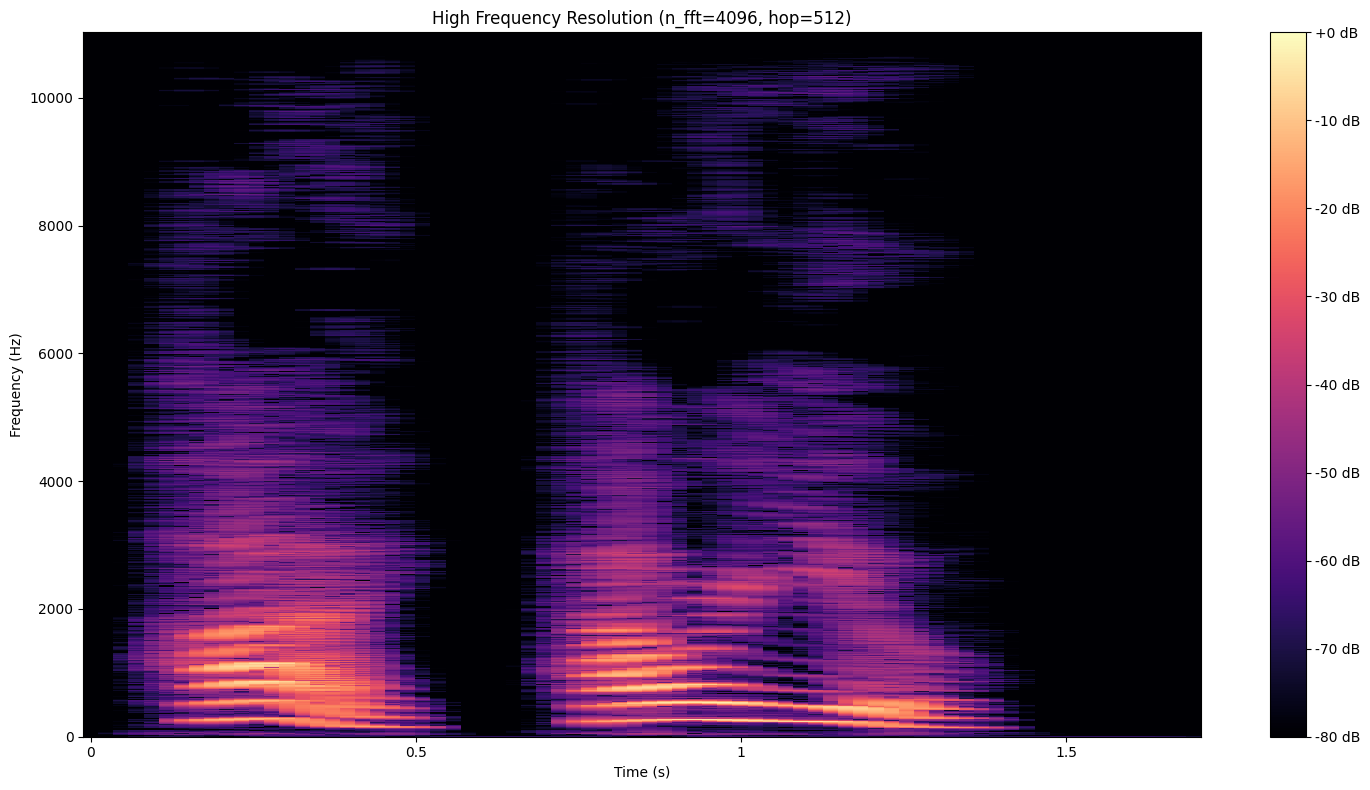

In [ ]:
N_FFT_HIGH_FREQ = 4096
HOP_LENGTH_HIGH_FREQ = N_FFT_HIGH_FREQ // 8

# Perform STFT
S_high_f = librosa.stft(waveform, n_fft=N_FFT_HIGH_FREQ, hop_length=HOP_LENGTH_HIGH_FREQ)
S_db_high_f = librosa.amplitude_to_db(np.abs(S_high_f), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(15, 8))
librosa.display.specshow(S_db_high_f,
                         sr=sample_rate,
                         x_axis='time',
                         y_axis='hz',
                         cmap='magma',
                         hop_length=HOP_LENGTH_HIGH_FREQ)
plt.colorbar(format='%+2.0f dB')
plt.title(f'High Frequency Resolution (n_fft={N_FFT_HIGH_FREQ}, hop={HOP_LENGTH_HIGH_FREQ})')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

# Window Size = 256

**Good time resolution** →  we can see quick changes clearly

**Poor frequency resolution** → frequency bands look blurry or thick so in a short piece of signal doesn’t contain enough cycles of each frequency.

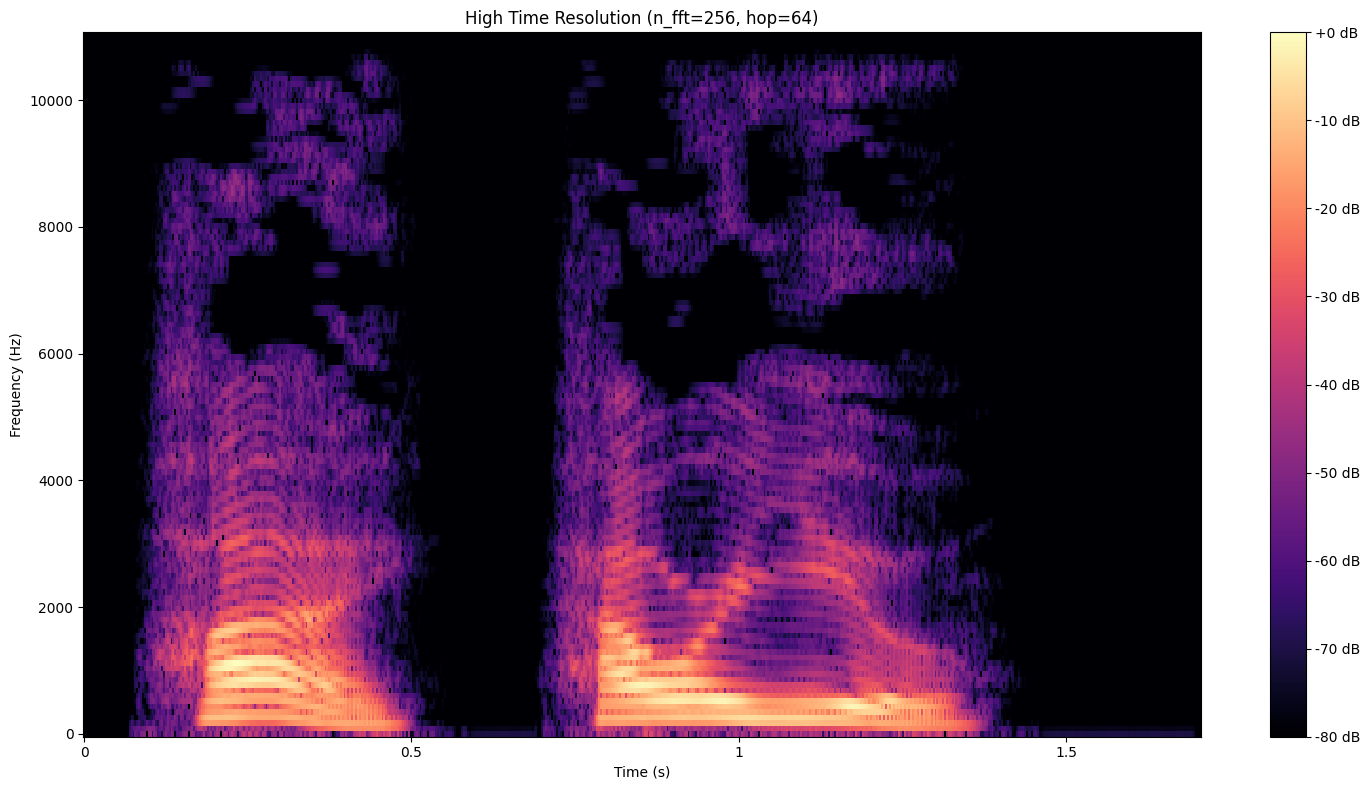

In [ ]:
N_FFT_HIGH_TIME = 256
HOP_LENGTH_HIGH_TIME = N_FFT_HIGH_TIME // 4
# Perform STFT
S_high_t = librosa.stft(waveform, n_fft=N_FFT_HIGH_TIME, hop_length=HOP_LENGTH_HIGH_TIME)
S_db_high_t = librosa.amplitude_to_db(np.abs(S_high_t), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(15, 8))
librosa.display.specshow(S_db_high_t,
                         sr=sample_rate,
                         x_axis='time',
                         y_axis='hz',
                         cmap='magma',
                         hop_length=HOP_LENGTH_HIGH_TIME)
plt.colorbar(format='%+2.0f dB')
plt.title(f'High Time Resolution (n_fft={N_FFT_HIGH_TIME}, hop={HOP_LENGTH_HIGH_TIME})')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()



---



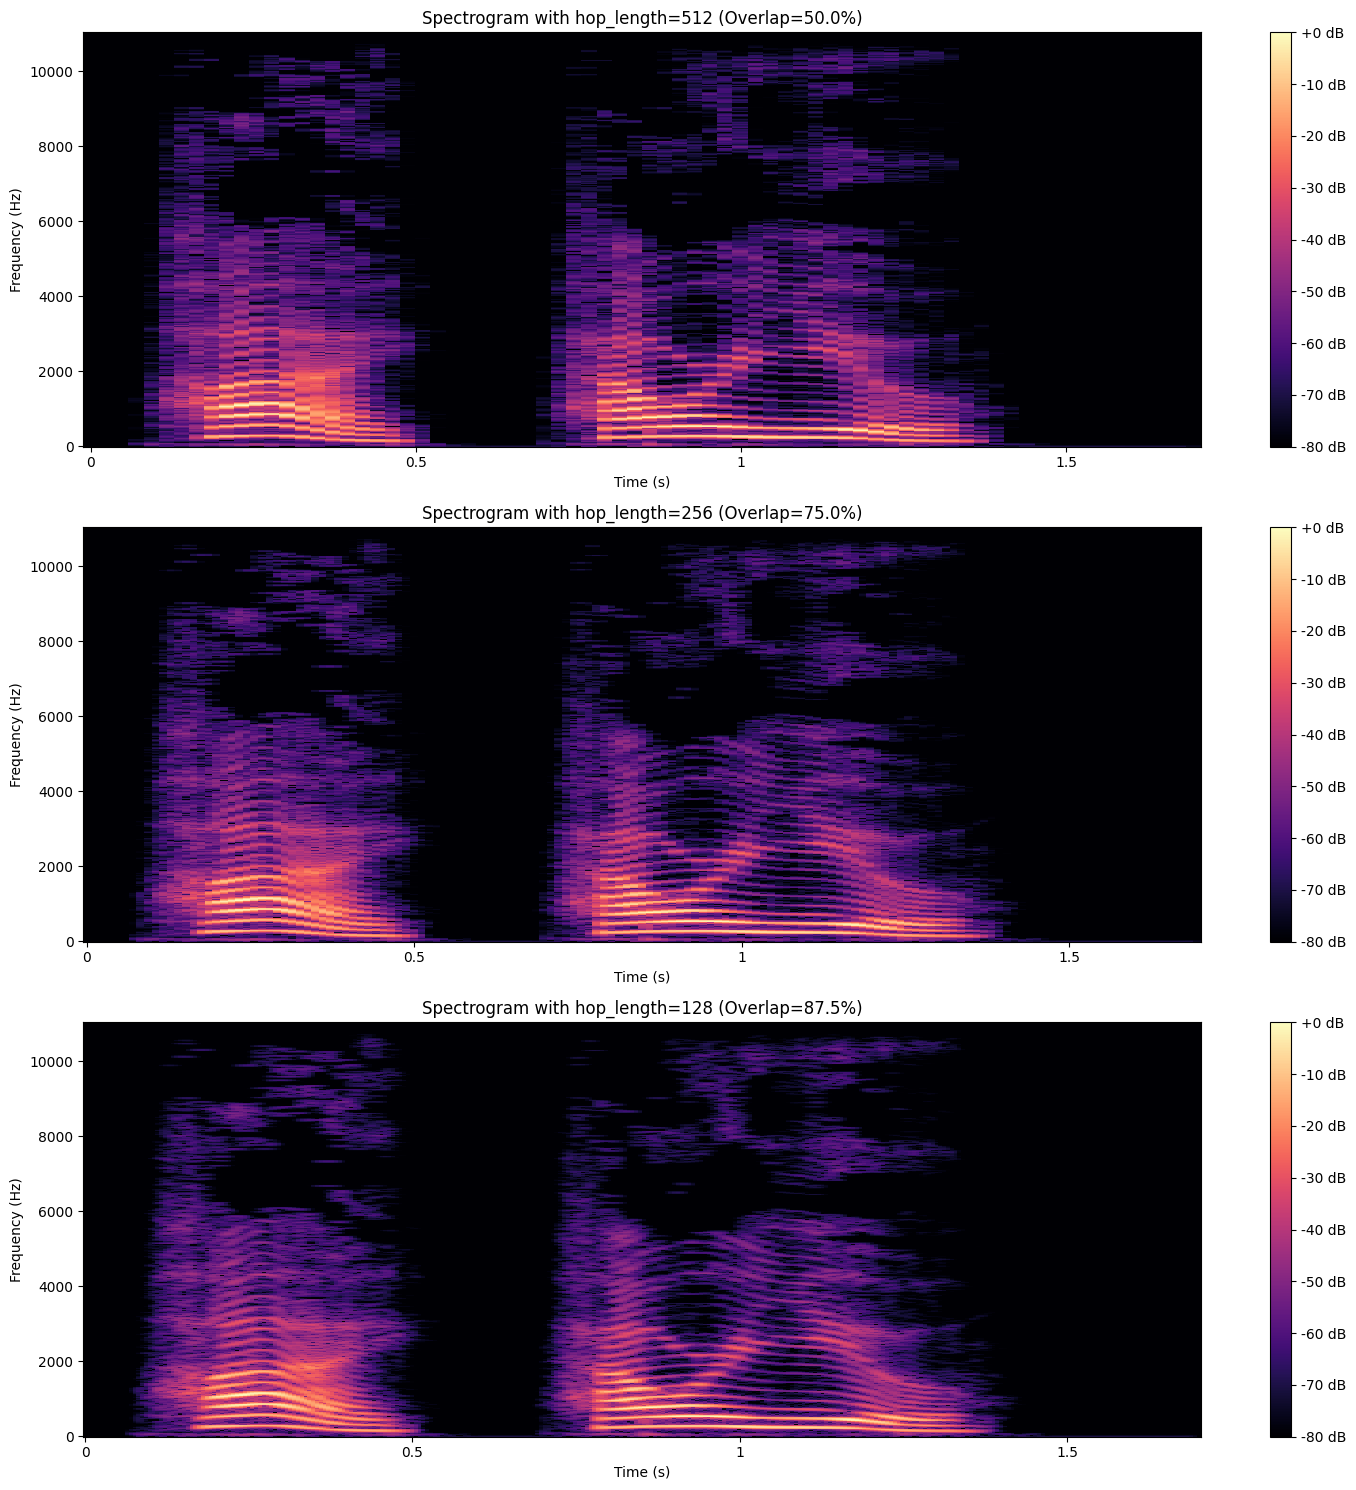

In [ ]:
N_FFT = 1024

hop_lengths = [N_FFT // 2, N_FFT // 4, N_FFT// 8]

plt.figure(figsize=(15, 15))

for i, hop in enumerate(hop_lengths, 1):
    S = librosa.stft(waveform, n_fft=N_FFT, hop_length=hop)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.subplot(3, 1, i)
    librosa.display.specshow(S_db,
                             sr=sample_rate,
                             x_axis='time',
                             y_axis='hz',
                             cmap='magma',
                             hop_length=hop)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram with hop_length={hop} (Overlap={(1 - hop/N_FFT)*100:.1f}%)')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()




---



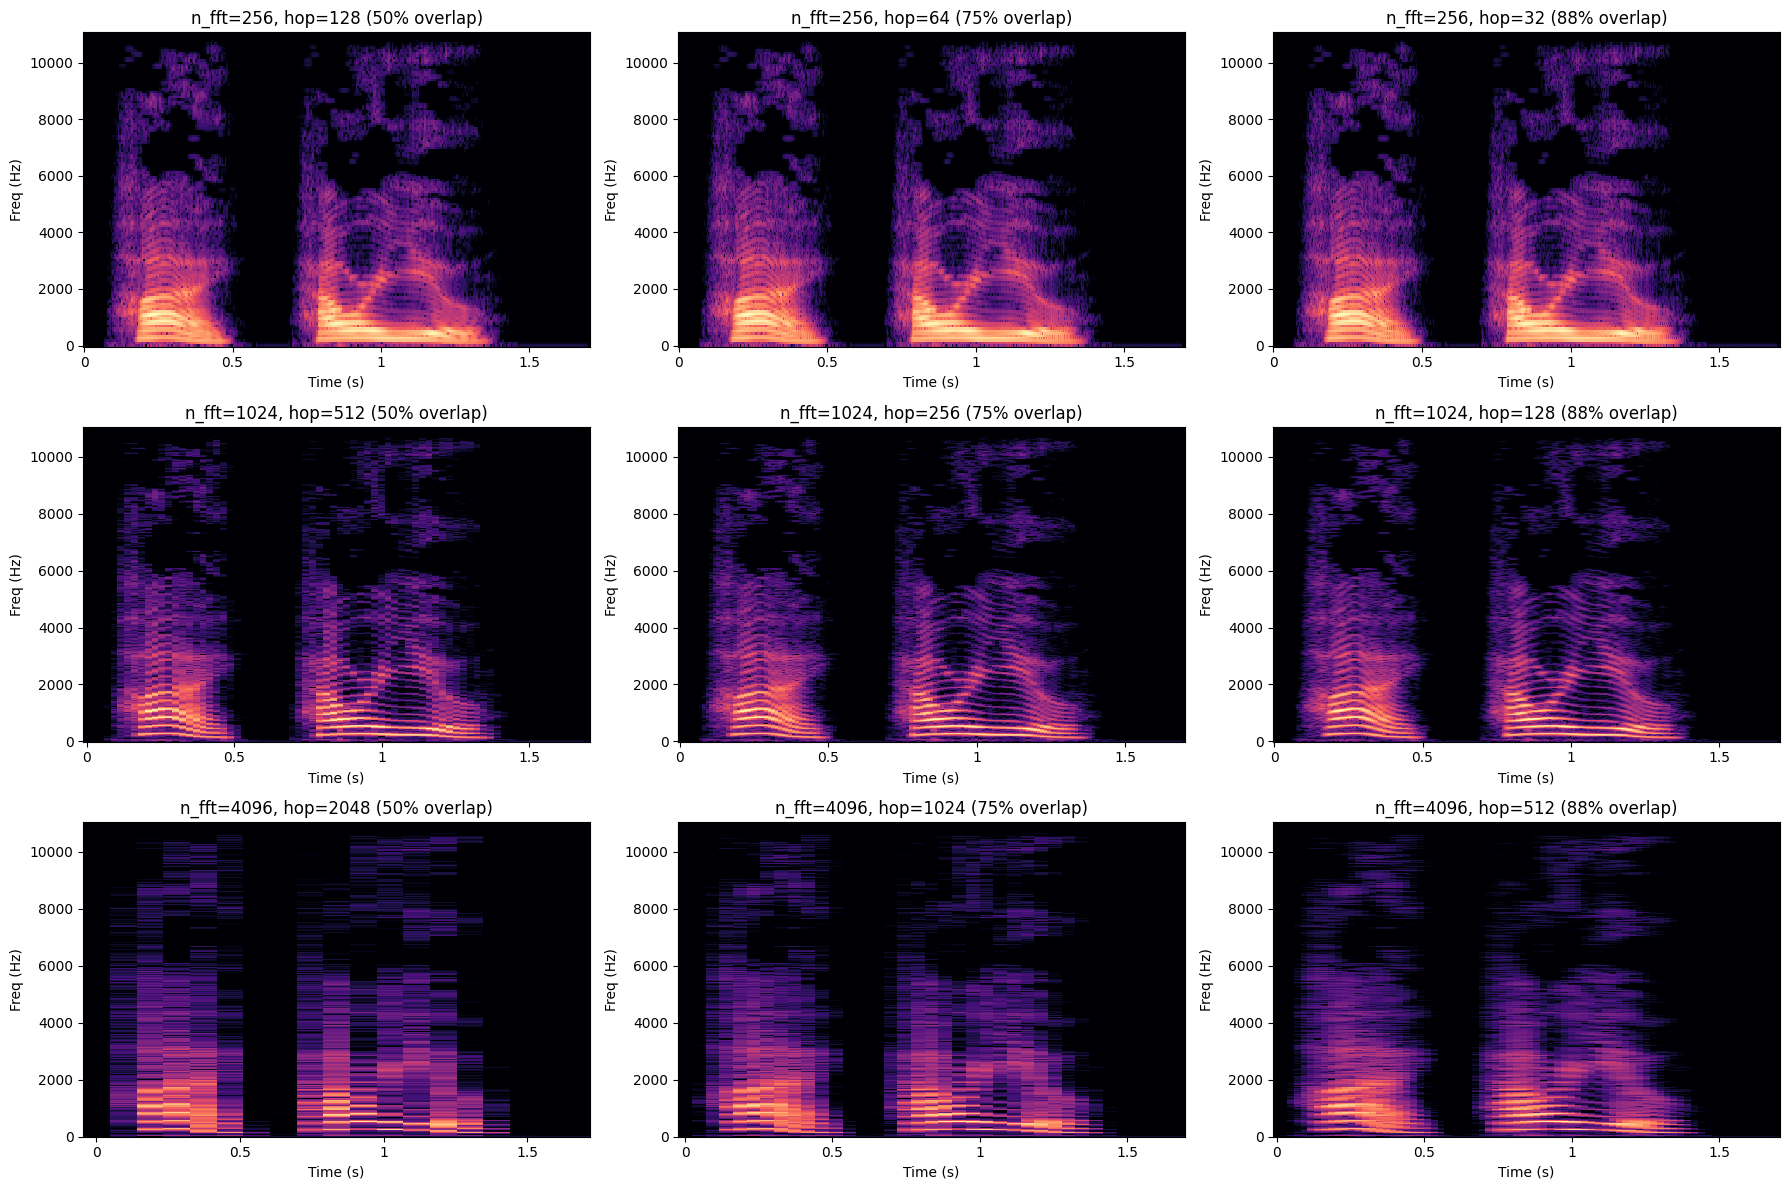

In [ ]:
# Different window sizes
n_ffts = [256, 1024, 4096]
# Different overlaps
hop_divisors = [2, 4, 8]

plt.figure(figsize=(18, 12))

plot_num = 1
for n_fft in n_ffts:
    for divisor in hop_divisors:
        hop = n_fft // divisor
        S = librosa.stft(waveform, n_fft=n_fft, hop_length=hop)
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

        plt.subplot(len(n_ffts), len(hop_divisors), plot_num)
        librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma', hop_length=hop)
        plt.title(f'n_fft={n_fft}, hop={hop} ({(1 - hop/n_fft)*100:.0f}% overlap)')
        plt.xlabel('Time (s)')
        plt.ylabel('Freq (Hz)')
        plot_num += 1

plt.tight_layout()
plt.show()
